# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temp = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cities_searched = []
set_counter = 0
indexes = np.arange(-60,0,1)
units = "imperial"

print(f'Begining Data Retrieval')
print(f'-----------------------')
for city in cities:
    try:
        indexes = indexes + 60
        for index in indexes:
            base_url = "http://api.openweathermap.org/data/2.5/weather?"
            query_url = (f'{base_url}appid={api_key}&q={cities[index]}&units={units}')
            try:
                weather = requests.get(query_url)
                weather_json = weather.json()
                print(f'Processing Record {index + 1} of set {set_counter + 1} | {cities[index]}')
                temp.append(weather_json["main"]["temp"])
                cloudiness.append(weather_json["clouds"]["all"])
                country.append(weather_json["sys"]["country"])
                date.append(weather_json["dt"])
                humidity.append(weather_json["main"]["humidity"])
                lat.append(weather_json["coord"]["lat"])
                lng.append(weather_json["coord"]["lon"])
                max_temp.append(weather_json["main"]["temp_max"])
                wind_speed.append(weather_json["wind"]["speed"])
                cities_searched.append(weather_json["name"])
            except:
                print(f'City not found. Skipping...')
    except:
        break
    set_counter = set_counter + 1
    time.sleep(60)
print(f'-----------------------')
print(f'Data Retrieval Compeleted')
print(f'-----------------------')

Begining Data Retrieval
-----------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | busselton
Processing Record 3 of set 1 | burnie
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | nabire
Processing Record 6 of set 1 | arraial do cabo
Processing Record 7 of set 1 | makamba
Processing Record 8 of set 1 | quatre cocos
Processing Record 9 of set 1 | lebu
Processing Record 10 of set 1 | fortuna
Processing Record 11 of set 1 | bluff
Processing Record 12 of set 1 | meyungs
City not found. Skipping...
Processing Record 13 of set 1 | isangel
Processing Record 14 of set 1 | norman wells
Processing Record 15 of set 1 | myitkyina
Processing Record 16 of set 1 | butaritari
Processing Record 17 of set 1 | ribeira grande
Processing Record 18 of set 1 | mar del plata
Processing Record 19 of set 1 | castro
Processing Record 20 of set 1 | qaanaaq
Processing Record 21 of set 1 | guerrero negro
Processing Record 22 of set 1 | albany
Processing Record

Processing Record 185 of set 4 | lensk
Processing Record 186 of set 4 | tuktoyaktuk
Processing Record 187 of set 4 | lasa
Processing Record 188 of set 4 | palabuhanratu
City not found. Skipping...
Processing Record 189 of set 4 | hami
Processing Record 190 of set 4 | sao filipe
Processing Record 191 of set 4 | clyde river
Processing Record 192 of set 4 | geraldton
Processing Record 193 of set 4 | lavrentiya
Processing Record 194 of set 4 | gorontalo
Processing Record 195 of set 4 | dubovyy umet
Processing Record 196 of set 4 | fukue
Processing Record 197 of set 4 | ancud
Processing Record 198 of set 4 | smithers
Processing Record 199 of set 4 | omsukchan
Processing Record 200 of set 4 | aire-sur-la-lys
Processing Record 201 of set 4 | aquiraz
Processing Record 202 of set 4 | matadi
Processing Record 203 of set 4 | port elizabeth
Processing Record 204 of set 4 | puri
Processing Record 205 of set 4 | nikolskoye
Processing Record 206 of set 4 | issoire
Processing Record 207 of set 4 | ang

Processing Record 372 of set 7 | saint-pierre
Processing Record 373 of set 7 | decatur
Processing Record 374 of set 7 | katobu
Processing Record 375 of set 7 | grindavik
Processing Record 376 of set 7 | berlevag
Processing Record 377 of set 7 | kerteh
City not found. Skipping...
Processing Record 378 of set 7 | diego de almagro
Processing Record 379 of set 7 | kem
Processing Record 380 of set 7 | asau
City not found. Skipping...
Processing Record 381 of set 7 | chernyshevskiy
Processing Record 382 of set 7 | pacific grove
Processing Record 383 of set 7 | kars
Processing Record 384 of set 7 | cacador
Processing Record 385 of set 7 | aloleng
Processing Record 386 of set 7 | baykit
Processing Record 387 of set 7 | mount pleasant
Processing Record 388 of set 7 | samalaeulu
City not found. Skipping...
Processing Record 389 of set 7 | sisimiut
Processing Record 390 of set 7 | polovinnoye
Processing Record 391 of set 7 | mlalo
Processing Record 392 of set 7 | southbridge
Processing Record 393

Processing Record 556 of set 10 | lakeland highlands
Processing Record 557 of set 10 | virginia beach
Processing Record 558 of set 10 | blackburn
Processing Record 559 of set 10 | pokhara
Processing Record 560 of set 10 | rocha
Processing Record 561 of set 10 | korla
City not found. Skipping...
Processing Record 562 of set 10 | tawkar
City not found. Skipping...
Processing Record 563 of set 10 | digha
Processing Record 564 of set 10 | guayaramerin
Processing Record 565 of set 10 | inuvik
Processing Record 566 of set 10 | anadyr
Processing Record 567 of set 10 | hambantota
Processing Record 568 of set 10 | barcelos
Processing Record 569 of set 10 | pamfila
City not found. Skipping...
Processing Record 570 of set 10 | mafinga
City not found. Skipping...
Processing Record 571 of set 10 | wad rawah
Processing Record 572 of set 10 | pokosnoye
Processing Record 573 of set 10 | vaitape
Processing Record 574 of set 10 | comodoro rivadavia
Processing Record 575 of set 10 | aykhal
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
summary = pd.DataFrame({"City":cities_searched,
                       "Temperature":temp,
                       "Cloudiness":cloudiness,
                       "Country":country,
                       "Date":date,
                       "Humidity":humidity,
                       "Latitude":lat,
                       "Longitude":lng,
                       "Maximum Temp":max_temp,
                       "Wind Speed":wind_speed})
summary.head()
summary["Date"]
summary.to_csv(r'C:\Users\Dan\Documents\Data_Analytics_Bootcamp\Homework\6_Python_APIs\WeatherPy\WeatherPy.csv', 
               index = True, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

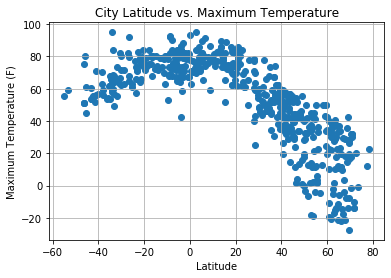

In [5]:
plt.scatter(summary["Latitude"],summary["Maximum Temp"])
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid()
plt.savefig('C:/Users/Dan/Documents/Data_Analytics_Bootcamp/Homework/6_Python_APIs/WeatherPy/Images/LatvTemp.png')

# There is a clear trend that the further from the equator a city is, the lower the maximum temperature will be. Interestingly,
# there are more cities further north than there are further south, which I think is because there is actually more land mass in
# the northern hemisphere than in the southern (Canada, Greenland and Northern Eurasia).

#### Latitude vs. Humidity Plot

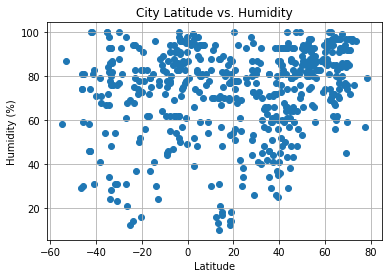

In [6]:
plt.scatter(summary["Latitude"],summary["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('C:/Users/Dan/Documents/Data_Analytics_Bootcamp/Homework/6_Python_APIs/WeatherPy/Images/LatvHumidity.png')

# It appears based on this dataset that northern cities are more humid than those closer to the equator or in the southern 
# hemisphere. This doesn't make a lot of sense to me as it is currently winter in the northern hemisphere and cold air tends to
# be dryer.

#### Latitude vs. Cloudiness Plot

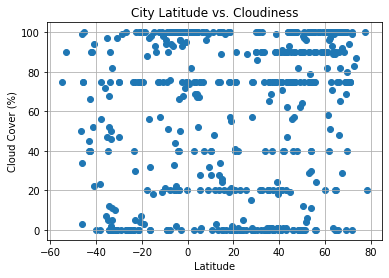

In [7]:
plt.scatter(summary["Latitude"],summary["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.grid()
plt.savefig('C:/Users/Dan/Documents/Data_Analytics_Bootcamp/Homework/6_Python_APIs/WeatherPy/Images/LatvCloudiness.png')

# I do not see any clear trends by latitude for cloudiness, though there is certainly some clustering around specific
# percentages (0%, 20%, 40%, 75%, 90% and 100%). I would imagine that this most likely has something to do with how cloud cover
# is reported or with specific meteorological phenomenon.

#### Latitude vs. Wind Speed Plot

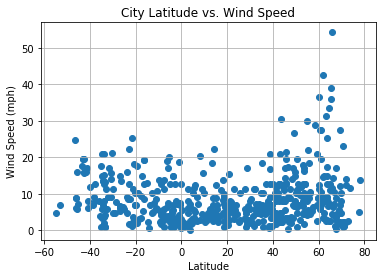

In [8]:
plt.scatter(summary["Latitude"],summary["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('C:/Users/Dan/Documents/Data_Analytics_Bootcamp/Homework/6_Python_APIs/WeatherPy/Images/LatvWindSpeed.png')

# There is a trend toward greater wind speeds further from the equator. Again we can see that there are more cities further in
# the north than the south and so it appears that there is more intense weather in the north than the south.